In [1]:
# import important libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mul(x, y):
    return [x[i] * y[i] for i in range(len(x))]

In [107]:
from sklearn.datasets import load_boston

data = load_boston(return_X_y=True)
x, y = data[0][:, 5][:100], data[1][:100]

In [108]:
x.shape, y.shape

((100,), (100,))

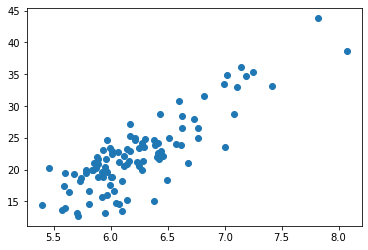

In [109]:
plt.scatter(x, y);

# Notes

### What do we want to do? 

Find the best line matching all the points. In this case, we are dealing with only **one independent** variable so we have a straight line.

We all know the formula for a straight line:
$$
Y = mX + b
$$

Y: The dependent variable or what we want to predict.

X: The independent variable. Our feature, our parameter, our column.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Karl_Marx_001.jpg/800px-Karl_Marx_001.jpg" alt="Karl Marx, whose variety of communist theory is known as Marxism" style="width: 300px;"/>

m: The slope of the line or how _x_ translates to _y_.

b: The bias of the line or where the line intercepts the _y-axis_.

**Our goal:** Find the best slope and bias to minimize errors in predicting _y_ from _x_.

Let's consider this particular formula for _m_:
$$
m = \frac{n\sum XY - \sum X\sum Y}{n\sum X^2 - (\sum X)^2}
$$

And for _b_, this formula:
$$
b = \bar Y - m\bar X
$$
Where $\bar Y$ and $\bar X$ are average of Y and X accordingly.

We have everything now. Let's code it:

In [110]:
def simple_LR(x, y):
    assert len(x) == len(y), "The lengths do not match!"
    
    n = len(x)
    
    # the formula has four parts
    one   = n * sum(np.multiply(x, y))
    two   = sum(x) * sum(y)
    three = n * sum(np.multiply(x, x))
    four  = sum(x) * sum(x)
    
    m = (one - two) / (three - four)
    b = np.mean(y) - m * np.mean(x)
    
    return m, b

In [111]:
m, b = simple_LR(x, y)

In [112]:
m, b

(10.223463401699288, -41.42826246618807)

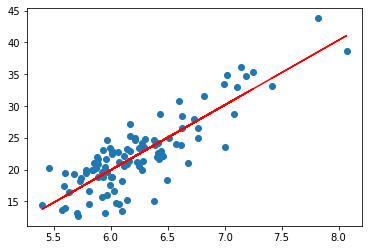

In [113]:
plt.scatter(x, y)
y_line = m * x + b
plt.plot(x, y_line, color='red');

In [114]:
def predict(x_test, m, b):
    y_pred = m * x_test + b
    return y_pred

In [115]:
m, b

(10.223463401699288, -41.42826246618807)

In [116]:
x_test = 514
print("The predicted value is: " + str(predict(x_test, m, b)))

The predicted value is: 5213.431926007245


In [119]:
x_test = x[80:]

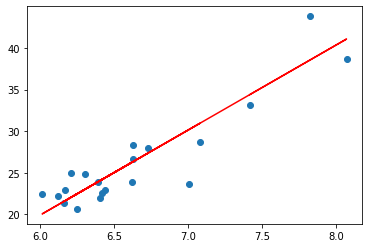

In [120]:
plt.scatter(x_test, y[80:])
y_line = m * x_test + b
plt.plot(x_test, y_line, color='red');

### Pretty easy right? Let's make it even easier by using scikit-learn library!

In [121]:
from sklearn.linear_model import LinearRegression

In [139]:
# making a bigger dataset

x, y = data[0][:, 12], data[1]

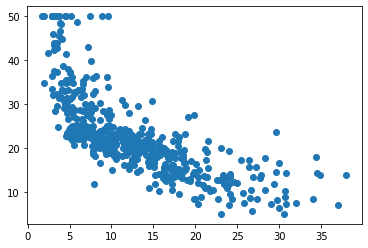

In [140]:
plt.scatter(x, y);

In [141]:
# let's split x and make train and test from that

boundary = int(len(x) * 0.8)
x_train, x_test = x[:boundary], x[boundary:]
y_train = y[:boundary]

In [154]:
x_train.reshape(-1, 1).shape, y_train.shape

((404, 1), (404,))

In [158]:
reg = LinearRegression()

reg.fit(x_train.reshape(-1, 1), y_train)

m = reg.coef_
b = reg.intercept_

m, b

(array([-0.96173416]), 35.09618640418044)

In [161]:
y_pred = reg.predict(x_test.reshape(-1, 1))  # get the line

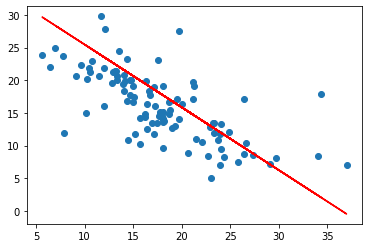

In [162]:
plt.scatter(x_test, y[boundary:]);  # test it against actualy answers
plt.plot(x_test, y_pred, color='red');

It doesn't end here. Typically, the procedure is that we first define a line, and then try to improve it using a method. For exmaple, we first define our $m$ and $b$ to be both 0s and then add to or subtract from them to make a new line and continue doing that until we choose not to continue.

For simple linear regression we can just not do that. For this, we can just **find** the best line. I'll tell you why.

To do this, we have to define a function that we want to minimize or maximize. Here, we use **sum of square of differences** as our **error** function which we want to minimize.

Assuming we already know our **best line**, say $\hat Y = pX + q$, we define $Error$ as follows:
$$
Error = \sum (\hat Y - Y)^2
$$

Y is the target in our data by the way. The actual target value.

What do we do when we want to minimize something? YES! **Differentiation**.

Now because of the fact that our error is second-degree polynomial, it only has **one** minimum and we can just **find** that minimum using differantiation.

For each variable that we want to optimize ($p$ and $q$ here), we have to find the partial derivative of $Error$ concerning the variable, solve dertivate = 0, and find the **best** value for the variable.

For example for $p$, we want to find this:
$$
\frac {\partial Error}{\partial p} = \frac {\partial}{\partial p} \sum (\hat Y - Y)^2
$$
Or equivalently:
$$
\frac {\partial Error}{\partial p} = \frac {\partial}{\partial p} \sum (Y - pX - q)^2
$$

**Exercise:** How to calculate this? That's your job folks. Here's everything you need:

https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660#f6e3

After understanding what is happening, do the same derivation but this time consider $q$.

There you go! We reach the formula given earlier.